In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import make_forecasting_frame
from sklearn.ensemble import AdaBoostRegressor
from tsfresh.utilities.dataframe_functions import impute

import warnings
warnings.filterwarnings('ignore')

/Users/max/Documents/tsfresh/venv/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Users/max/Documents/tsfresh/venv/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Construct the signal

In [2]:
x_up = np.arange(100)*0.1 + np.sin(30*np.pi*np.linspace(0, 1, 100)) + np.random.normal(scale=0.7,size=100)
x_down = np.arange(100, 0, -1)*0.15 + np.sin(30*np.pi*np.linspace(0, 1, 100)) + np.random.normal(scale=0.7,size=100)
x = np.concatenate([x_up, x_down])
x = pd.Series(data=x, index=pd.date_range('1/1/2011', periods=len(x), freq='H'))
x.head()

2011-01-01 00:00:00    0.768384
2011-01-01 01:00:00    1.019585
2011-01-01 02:00:00    1.226405
2011-01-01 03:00:00    0.307992
2011-01-01 04:00:00    1.119178
Freq: H, dtype: float64

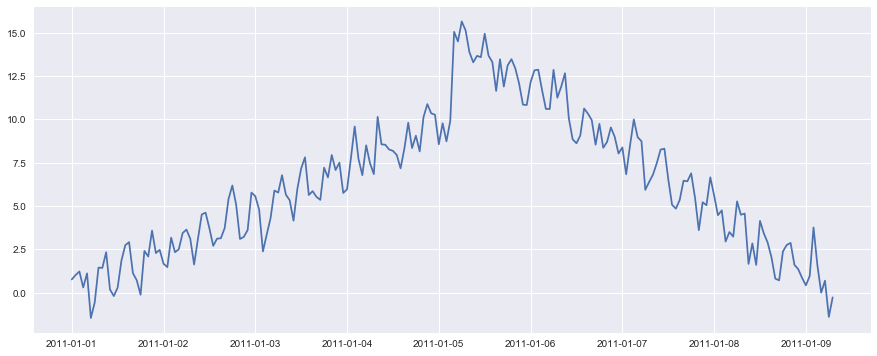

In [3]:
plt.figure(figsize=(15, 6))
plt.plot(x)
plt.show()

So, we have a time series and want to construct a time series model that is able to predict next data points.

To do that, we have to construct a feature matrix by calculating the features for sub time series (see the forecasting section in the tsfresh documentation).

In [4]:
df_shift, y = make_forecasting_frame(x, kind="price", max_timeshift=10, rolling_direction=1)

In [5]:
df_shift.head()

,time,val,id,kind
1746,2011-01-01 00:00:00,0.768384,2011-01-01 01:00:00,price
1548,2011-01-01 00:00:00,0.768384,2011-01-01 02:00:00,price
1747,2011-01-01 01:00:00,1.019585,2011-01-01 02:00:00,price
1351,2011-01-01 00:00:00,0.768384,2011-01-01 03:00:00,price
1549,2011-01-01 01:00:00,1.019585,2011-01-01 03:00:00,price


`df_shift` is ready to be passed into the feature extraction process in tsfresh 

In [6]:
X = extract_features(df_shift, column_id="id", column_sort="time", column_value="val", impute_function=impute, 
                     show_warnings=False)

Feature Extraction: 100%|██████████| 199/199 [00:03<00:00, 57.65it/s]
 'feature__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"'
 'feature__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"'
 'feature__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"'
 'feature__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"'
 'feature__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'feature__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"'
 'feature__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"'
 'feature__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"intercept"'
 'feature__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"rvalue"'
 'feature__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"slope"'
 'feature__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"stderr"'
 'feature__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"intercept"'
 'feature__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"rval

In [7]:
X.head()

variable,feature__abs_energy,feature__absolute_sum_of_changes,"feature__agg_autocorrelation__f_agg_""mean""","feature__agg_autocorrelation__f_agg_""median""","feature__agg_autocorrelation__f_agg_""var""","feature__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","feature__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","feature__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","feature__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","feature__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,feature__time_reversal_asymmetry_statistic__lag_1,feature__time_reversal_asymmetry_statistic__lag_2,feature__time_reversal_asymmetry_statistic__lag_3,feature__value_count__value_-inf,feature__value_count__value_0,feature__value_count__value_1,feature__value_count__value_inf,feature__value_count__value_nan,feature__variance,feature__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
2011-01-01 01:00:00,0.590414,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2011-01-01 02:00:00,1.629968,0.251201,-1.000000,-1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.015776,0.0
2011-01-01 03:00:00,3.134038,0.458022,-0.748440,-0.748440,0.555502,0.0,0.0,0.0,0.0,0.0,...,0.931551,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.035073,0.0
2011-01-01 04:00:00,3.228898,1.376435,-0.219074,-0.408501,0.125363,0.0,0.0,0.0,0.0,0.0,...,-0.113514,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.117342,0.0
2011-01-01 05:00:00,4.481457,2.187620,-0.153947,-0.189264,0.174506,0.0,0.0,0.0,0.0,0.0,...,-0.101497,0.812059,0.0,0.0,0.0,0.0,0.0,0.0,0.107199,0.0


Here, the first row for `id=2011-01-01 01:00:00` contains features that were just calculate on `2011-01-01 00:00:00`. 
The third row `2011-01-01 03:00:00` contains features that were calculated on `2011-01-01 00:00:00`, `2011-01-01 01:00:00` and `2011-01-01 02:00:00`.

However, because we set `max_timeshift` to 10, the features will only be based on a maximum number of 10 historic data points.

We are now using the features, to train a normal AdaBoostRegressor to predict the next time step. So for every data point, we fit the model on all older data points, then predict the next data point. Then we fit it on all data points again plus that predicted data point and so on.

In [8]:
ada = AdaBoostRegressor()

y_pred = [0] * len(y)
y_pred[0] = y.iloc[0]

for i in range(1, len(y)):
    ada.fit(X.iloc[:i], y[:i])
    y_pred[i] = ada.predict(X.iloc[i, :])
    
y_pred = pd.Series(data=y_pred, index=y.index)

In [9]:
y_pred = pd.Series(data=y_pred, index=y.index)

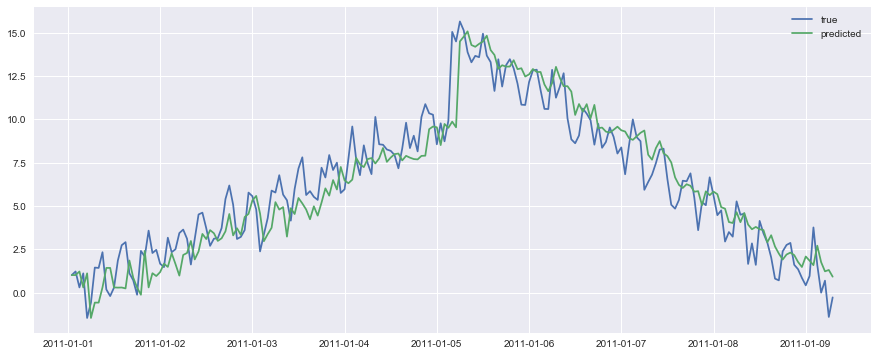

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(y, label="true")
plt.plot(y_pred, label="predicted")
plt.legend()
plt.show()